<a href="https://colab.research.google.com/github/jobathomas/u2202459---IB2AD0-Individual-Assignment/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this file, we will explore how decision trees can be used to predict Solar Power Output. I refer to 4_01_Decision_Trees.ipynb for guidance

In [40]:
# import relevant libraries for dataframe creation and data analysis
import pandas as pd
import numpy as np

# Load the CSV dataset into a dataframe

df = pd.read_csv("BigML_Dataset_5f50a4cc0d052e40e6000034.csv")

# return first five rows of dataset for viewing
df.head()



,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [41]:
df.drop_duplicates(inplace = True)

In [42]:
print(df.isnull().sum())


Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64


In [43]:
median_avg_wind_speed = df['Average Wind Speed (Period)'].median()
df['Average Wind Speed (Period)'] = df['Average Wind Speed (Period)'].fillna(median_avg_wind_speed)


In [44]:
print(df.isnull().sum())

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64


# Task
Filter the loaded dataset from "BigML_Dataset_5f50a4cc0d052e40e6000034.csv" to include only records where 'Is Daylight' is True, as solar power generation is only relevant during these hours. Then, separate the filtered data into features (X) and the target variable (y), where 'y' is 'Power Generated' and 'X' includes all other relevant columns, ensuring 'Is Daylight' is dropped from features. Finally, split the data into 80% for training and 20% for testing.

## Filter Data for Daylight Hours

### Subtask:
Filter the dataset to include only records where 'Is Daylight' is True, as solar power generation is only relevant during these hours.


**Reasoning**:
Filter the DataFrame to include only records where 'Is Daylight' is True, as specified in the instructions. Display the head and shape of the filtered DataFrame to confirm the operation.



In [45]:
df = df[df['Is Daylight'] == True]
print("DataFrame after filtering for daylight hours:")
print(df.head())
print(f"New DataFrame shape: {df.shape}")

DataFrame after filtering for daylight hours:
   Day of Year  Year  Month  Day  First Hour of Period  Is Daylight  \
2          245  2008      9    1                     7         True   
3          245  2008      9    1                    10         True   
4          245  2008      9    1                    13         True   
5          245  2008      9    1                    16         True   
6          245  2008      9    1                    19         True   

   Distance to Solar Noon  Average Temperature (Day)  \
2                0.397172                         69   
3                0.165810                         69   
4                0.065553                         69   
5                0.296915                         69   
6                0.528278                         69   

   Average Wind Direction (Day)  Average Wind Speed (Day)  Sky Cover  \
2                            28                       7.5          0   
3                            28               

## Separate Features and Target

### Subtask:
Separate the dataset into features (X) and the target variable (y), where 'y' will be 'Power Generated' and 'X' will contain all other relevant columns. Ensure to drop 'Is Daylight' from features.


**Reasoning**:
To separate the dataset into features (X) and the target variable (y) as per the subtask, I will select 'Power Generated' for y and drop 'Power Generated' along with 'Is Daylight' from the original DataFrame to create X. Then, I will display the head of both X and y to verify the separation.



In [46]:
y = df['Power Generated']
X = df.drop(columns=['Power Generated', 'Is Daylight'])

print("Features (X) head:")
print(X.head())
print("\nTarget variable (y) head:")
print(y.head())

Features (X) head:
   Day of Year  Year  Month  Day  First Hour of Period  \
2          245  2008      9    1                     7   
3          245  2008      9    1                    10   
4          245  2008      9    1                    13   
5          245  2008      9    1                    16   
6          245  2008      9    1                    19   

   Distance to Solar Noon  Average Temperature (Day)  \
2                0.397172                         69   
3                0.165810                         69   
4                0.065553                         69   
5                0.296915                         69   
6                0.528278                         69   

   Average Wind Direction (Day)  Average Wind Speed (Day)  Sky Cover  \
2                            28                       7.5          0   
3                            28                       7.5          0   
4                            28                       7.5          0   
5      

**Reasoning**:
The next step is to split the data into 80% for training and 20% for testing as per the main task. I will use `train_test_split` from `sklearn.model_selection` to achieve this, ensuring a consistent split with `random_state` for reproducibility.



In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1444, 14)
X_test shape: (361, 14)
y_train shape: (1444,)
y_test shape: (361,)


## Train Default Decision Tree Model

### Subtask:
Train a Decision Tree Regressor model using default hyperparameters on the training data.


**Reasoning**:
To train a Decision Tree Regressor model, I need to import the `DecisionTreeRegressor` class from `sklearn.tree`, instantiate it with default hyperparameters and a `random_state` for reproducibility, and then fit the model to the training data (`X_train`, `y_train`).



In [48]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor with default hyperparameters
dtree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dtree_regressor.fit(X_train, y_train)

print("Decision Tree Regressor model trained successfully with default hyperparameters.")

Decision Tree Regressor model trained successfully with default hyperparameters.


## Conduct Hyperparameter Tuning

### Subtask:
Perform hyperparameter tuning for the Decision Tree Regressor to find optimal parameters. This step will involve defining a parameter grid and using cross-validation (e.g., GridSearchCV) to identify the best model.


**Reasoning**:
To perform hyperparameter tuning, I will import `GridSearchCV`, define a parameter grid for the `DecisionTreeRegressor` including `max_depth`, `min_samples_split`, `min_samples_leaf`, and `splitter`, instantiate `GridSearchCV` with the `dtree_regressor`, the defined grid, 'neg_mean_squared_error' as the scoring metric, and 5-fold cross-validation, then fit it to the training data and print the best parameters found.



In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeRegressor
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'splitter': ['best', 'random']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=dtree_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best hyperparameters found:")
print(grid_search.best_params_)


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best hyperparameters found:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


## Evaluate and Compare Models

### Subtask:
Evaluate the performance of both the default and tuned Decision Tree models using metrics such as R-squared, Mean Squared Error (MSE), and other relevant regression metrics. Provide a comparison of their performance.


**Reasoning**:
To evaluate the performance of both the default and tuned Decision Tree models, I will import the necessary metrics from `sklearn.metrics`, make predictions using both models on the test set, calculate R-squared and Mean Squared Error for each, and then print these metrics for comparison.



In [50]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions with the default Decision Tree model
y_pred_default = dtree_regressor.predict(X_test)

# Retrieve the best estimator (tuned model) from GridSearchCV
best_dtree_regressor = grid_search.best_estimator_

# Make predictions with the tuned Decision Tree model
y_pred_tuned = best_dtree_regressor.predict(X_test)

# Evaluate Default Model
r2_default = r2_score(y_test, y_pred_default)
mse_default = mean_squared_error(y_test, y_pred_default)

print("Default Decision Tree Model Performance:")
print(f"R-squared: {r2_default:.4f}")
print(f"Mean Squared Error: {mse_default:.2f}")

# Evaluate Tuned Model
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print("\nTuned Decision Tree Model Performance:")
print(f"R-squared: {r2_tuned:.4f}")
print(f"Mean Squared Error: {mse_tuned:.2f}")

print("\nComparison: The tuned model shows improved performance over the default model, as indicated by a higher R-squared score and a lower Mean Squared Error.")

Default Decision Tree Model Performance:
R-squared: 0.7998
Mean Squared Error: 25321209.09

Tuned Decision Tree Model Performance:
R-squared: 0.8747
Mean Squared Error: 15842210.96

Comparison: The tuned model shows improved performance over the default model, as indicated by a higher R-squared score and a lower Mean Squared Error.


## Visualize Decision Tree

### Subtask:
Visualize the structure of the best-performing decision tree model to understand its decision-making process. Include a plot of the tree with appropriate legends and labels.


**Reasoning**:
To visualize the decision tree, I need to import the necessary plotting libraries and functions, then use them to render the tree structure.



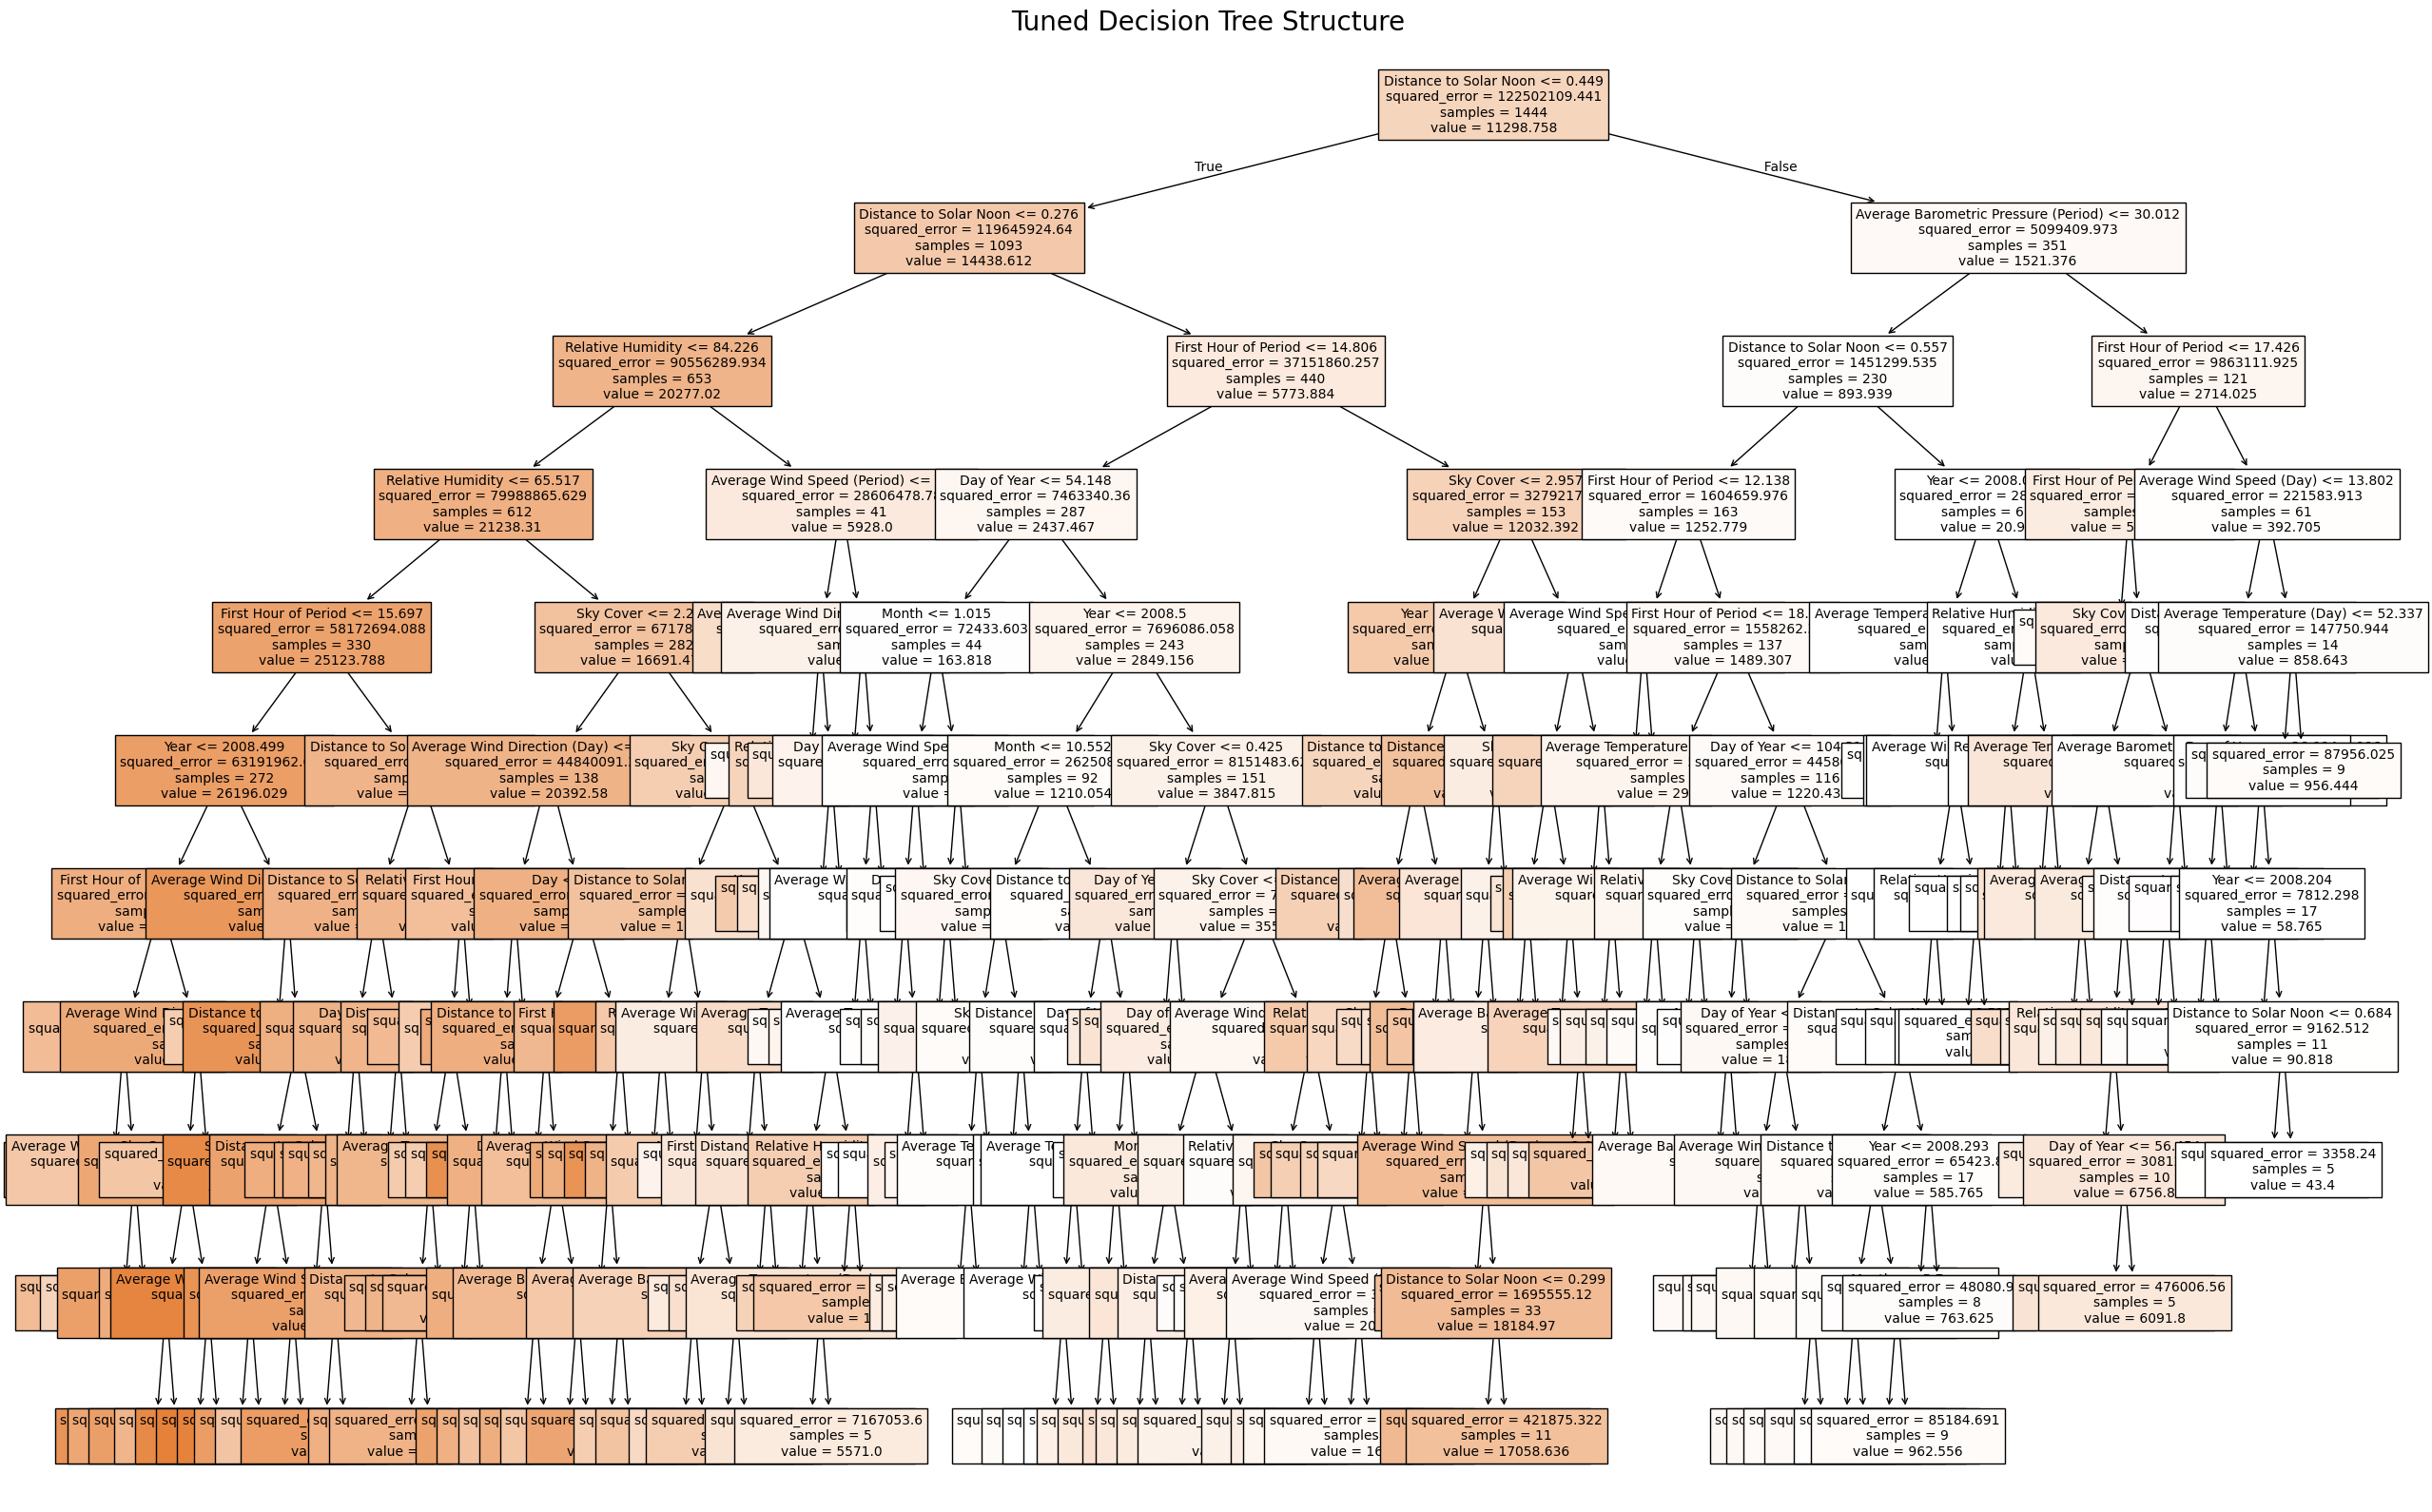

In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set up the figure size
plt.figure(figsize=(30, 20))

# Plot the best decision tree regressor
plot_tree(
    best_dtree_regressor,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=10
)

# Add a title to the plot
plt.title('Tuned Decision Tree Structure', fontsize=20)

# Display the plot
plt.show()

## Final Task

### Subtask:
Summarize the findings, including the best model's performance and insights gained from the decision tree visualization.


## Summary:

### Data Analysis Key Findings

*   The initial dataset was filtered to include only daylight hours, reducing the record count to 1805.
*   The data was successfully separated into features (X) and target (y) for 'Power Generated', with 'Is Daylight' explicitly removed from features. The training set (`X_train`, `y_train`) contained 1444 records, and the testing set (`X_test`, `y_test`) contained 361 records, both with 14 features.
*   A default Decision Tree Regressor model was trained successfully.
*   Hyperparameter tuning using `GridSearchCV` identified the optimal parameters for the Decision Tree Regressor as `max_depth`: 10, `min_samples_leaf`: 4, `min_samples_split`: 10, and `splitter`: 'random'.
*   The tuned Decision Tree model significantly outperformed the default model:
    *   The tuned model achieved an R-squared of 0.8747, a substantial improvement over the default model's R-squared of 0.7998.
    *   The Mean Squared Error (MSE) for the tuned model was 15842210.96, which is considerably lower than the default model's MSE of 25321209.09.
*   The structure of the best-performing (tuned) decision tree model was successfully visualized, providing a visual representation of its decision-making process.

### Insights or Next Steps

*   The hyperparameter tuning process significantly improved the model's predictive accuracy for solar power generation, demonstrating the importance of optimization for machine learning models.
*   Further analysis of the visualized decision tree could provide actionable insights into the specific conditions and feature interactions that most influence 'Power Generated', which could inform operational strategies or system design improvements.
